# Commerce Challenge 1 - Baseline Submission

This notebook provides a simple baseline for **Commerce Challenge 1: Weekly Store-SKU Demand Forecasting**.

**Goal**: Predict `units_sold_next_week` for each SKU-week combination
**Metric**: Root Mean Squared Error (RMSE) - Lower is better

## Instructions:
1. **Replace API credentials** in the first cell with your team's API key and name
2. **Run all cells** to generate and submit baseline predictions
3. **Check the output** for your submission score

This baseline uses only tabular sales data with a simple Random Forest regressor.

In [1]:
from agentds import BenchmarkClient

In [2]:
# 1. Initialize Client and Load Data

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# from agentds import BenchmarkClient

# # 🔑 REPLACE WITH YOUR CREDENTIALS
# client = BenchmarkClient(
#     api_key="adsb_AJp9fgtjuTRZ4Tk0mNnYDWxG_1759039055",        # Get from your team dashboard
#     team_name="clai"     # Your exact team name
# )


In [2]:
# 🔑 REPLACE WITH YOUR CREDENTIALS
client = BenchmarkClient(
    api_key="adsb_AJp9fgtjuTRZ4Tk0mNnYDWxG_1759039055",        # Get from your team dashboard
    team_name="clai"     # Your exact team name
)

In [ ]:

# # Load data from PVC paths
# print("📂 Loading Commerce Challenge 1 data...")

# # Load training and test data
# train_sales = pd.read_csv("./agent_ds_commerce/sales_history_train.csv")
# test_sales = pd.read_csv("./agent_ds_commerce/sales_history_test.csv")

# print(f"✅ Data loaded:")
# print(f"   Train sales: {train_sales.shape}")
# print(f"   Test sales: {test_sales.shape}")
# print(f"   Features: {list(train_sales.columns)}")

📂 Loading Commerce Challenge 1 data...
✅ Data loaded:
   Train sales: (66000, 5)
   Test sales: (12000, 4)
   Features: ['sku_id', 'week', 'units_sold', 'price', 'promo_flag']


In [ ]:
# train_sales[["sku_id","week","promo_flag"]] = train_sales[["sku_id","week","promo_flag"]].astype(int)

# sku1 = train_sales.query("sku_id == 1").sort_values("week")[["sku_id","week","units_sold","price","promo_flag"]]
# sku1.head()

,sku_id,week,units_sold,price,promo_flag
0,1,1,51,0.72,0
1,1,2,41,0.70,0
2,1,3,47,0.69,0
3,1,4,50,0.68,0
4,1,5,72,0.68,0


In [ ]:
# train_sales
# events_df = pd.read_csv("./agent_ds_commerce/store_events.csv")
# products_df = pd.read_csv("./agent_ds_commerce/products.csv")

In [ ]:
# # dtype conversion
# for col in ["sku_id","week","promo_flag"]:
#     train_sales[col] = train_sales[col].astype(int)

# # cycles
# train_sales["week_sin"] = np.sin(2*np.pi*train_sales["week"]/52.0)
# train_sales["week_cos"] = np.cos(2*np.pi*train_sales["week"]/52.0)
# train_sales.head()

,sku_id,week,units_sold,price,promo_flag,week_sin,week_cos
0,1,1,51,0.72,0,0.120537,0.992709
1,1,2,41,0.70,0,0.239316,0.970942
2,1,3,47,0.69,0,0.354605,0.935016
3,1,4,50,0.68,0,0.464723,0.885456
4,1,5,72,0.68,0,0.568065,0.822984


In [ ]:
# # products join
# prod = products_df.copy()
# if "category" in prod.columns:
#     prod["category"] = prod["category"].astype(str).fillna("unknown")
# else:
#     prod["category"] = "unknown"

# if "subtype" in prod.columns:
#     prod["subtype"] = prod["subtype"].astype(str).fillna("unknown")
# else:
#     prod["subtype"] = "unknown"

# if "base_price" not in prod.columns:
#     prod["base_price"] = np.nan
# train = train_sales.merge(
#     prod[["sku_id", "category", "subtype", "base_price"]],
#     on="sku_id",
#     how="left"
# )
# train.head()

,sku_id,week,units_sold,price,promo_flag,week_sin,week_cos,category,subtype,base_price
0,1,1,51,0.72,0,0.120537,0.992709,Beverages,water,0.69
1,1,2,41,0.70,0,0.239316,0.970942,Beverages,water,0.69
2,1,3,47,0.69,0,0.354605,0.935016,Beverages,water,0.69
3,1,4,50,0.68,0,0.464723,0.885456,Beverages,water,0.69
4,1,5,72,0.68,0,0.568065,0.822984,Beverages,water,0.69


In [ ]:
# # discount %
# def discount_pct(base_price, price):
#     if pd.isna(base_price) or base_price<=0 or pd.isna(price): return 0.0
#     return float(np.clip((base_price - price)/base_price, -1, 1))

# train["discount_pct"] = [discount_pct(bp,p) for bp,p in zip(train["base_price"], train["price"])]
# train.head()

,sku_id,week,units_sold,price,promo_flag,week_sin,week_cos,category,subtype,base_price,discount_pct
0,1,1,51,0.72,0,0.120537,0.992709,Beverages,water,0.69,-0.043478
1,1,2,41,0.70,0,0.239316,0.970942,Beverages,water,0.69,-0.014493
2,1,3,47,0.69,0,0.354605,0.935016,Beverages,water,0.69,0.000000
3,1,4,50,0.68,0,0.464723,0.885456,Beverages,water,0.69,0.014493
4,1,5,72,0.68,0,0.568065,0.822984,Beverages,water,0.69,0.014493


In [ ]:
# # events -> keyword flags
# """
# This is the part we can use agent to do a more reliable NLP processing to have
# better event feature extraction for prediction.
# """
# events_df["event_description"] = events_df["event_description"].fillna("").astype(str)
# KW = {
#     "holiday": ["holiday","christmas","new year","easter","thanksgiving"],
#     "weather": ["storm","rain","snow","heat","cold","weather"],
#     "sport":   ["game","match","tournament","sports","football","soccer","basketball","hockey"],
#     "school":  ["school","semester","back to school","vacation"],
#     "festival":["festival","parade","concert","fair"],
# }
# def event_flags(s):
#     s = s.lower()
#     return pd.Series({
#         "is_holiday": int(any(k in s for k in KW["holiday"])),
#         "is_weather": int(any(k in s for k in KW["weather"])),
#         "is_sport":   int(any(k in s for k in KW["sport"])),
#         "is_school":  int(any(k in s for k in KW["school"])),
#         "is_festival":int(any(k in s for k in KW["festival"])),
#     })
# ev_flags = pd.concat([events_df[["week"]], events_df["event_description"].apply(event_flags)], axis=1)
# ev_flags.head()


,week,is_holiday,is_weather,is_sport,is_school,is_festival
0,1,0,0,0,0,0
1,2,0,0,0,0,0
2,3,0,0,0,0,0
3,4,0,0,0,0,1
4,5,0,0,0,0,0


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import Ridge

# def fit_event_strength_model(train_df: pd.DataFrame, events_df: pd.DataFrame,
#                              roll_window: int = 3, alpha: float = 2.0,
#                              low_q: float = 0.33, high_q: float = 0.67):
#     """
#     Learn an 'event_strength' from event_description without any APIs.

#     Steps:
#       - Build weekly total units in train.
#       - Shift by +1 to create weekly_total_next (the label we want to explain).
#       - Build a short rolling baseline for weekly_total_next, get relative uplift.
#       - Train TF-IDF + Ridge using week-t text to predict week-(t+1) uplift.
#       - Return:
#          * per-week continuous predictions `event_strength_pred`
#          * per-week ordinal buckets: weak / mild / strong
#     """

#     # 1) Weekly totals in train
#     wk = train_df.groupby("week", as_index=False)["units_sold"].sum().rename(columns={"units_sold":"weekly_total"})
#     wk = wk.sort_values("week").reset_index(drop=True)

#     # 2) Label = next week's total (for week t, label is t+1)
#     wk["weekly_total_next"] = wk["weekly_total"].shift(-1)

#     # 3) Short rolling baseline for the LABEL (past-only relative to that label)
#     #    Use a centered-on-past estimator by shifting first, then rolling.
#     baseline = wk["weekly_total_next"].shift(1).rolling(roll_window, min_periods=1).mean()
#     wk["uplift"] = (wk["weekly_total_next"] - baseline) / baseline
#     wk["uplift"] = wk["uplift"].replace([np.inf, -np.inf], np.nan).fillna(0.0)
#     wk["uplift"] = wk["uplift"].clip(-1.0, 1.0)  # keep bounded

#     # 4) Join events (week-t text)
#     ev = events_df.copy()
#     ev["event_description"] = ev["event_description"].fillna("").astype(str)
#     data = wk.merge(ev[["week","event_description"]], on="week", how="left")

#     # 5) Train TF-IDF + Ridge on rows with valid uplift
#     train_mask = data["uplift"].notna()
#     X_text = data.loc[train_mask, "event_description"]
#     y_uplift = data.loc[train_mask, "uplift"].astype(float)

#     tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=5000)
#     X_tfidf = tfidf.fit_transform(X_text)

#     ridge = Ridge(alpha=alpha, random_state=42)
#     ridge.fit(X_tfidf, y_uplift)

#     # 6) Predict for ALL weeks we have descriptions for (train + test weeks)
#     X_all = tfidf.transform(data["event_description"])
#     data["event_strength_pred"] = np.clip(ridge.predict(X_all), -1.0, 1.0)

#     # 7) Bucketize into weak/mild/strong by quantiles of the TRAIN predictions
#     train_preds = data.loc[train_mask, "event_strength_pred"]
#     lo_thr = train_preds.quantile(low_q)
#     hi_thr = train_preds.quantile(high_q)

#     def bucketize(v):
#         if v <= lo_thr:  return "weak"
#         if v >= hi_thr:  return "strong"
#         return "mild"

#     data["event_strength_bucket"] = data["event_strength_pred"].apply(bucketize)

#     # Return per-week table you can merge by 'week'
#     return data[["week", "event_strength_pred", "event_strength_bucket"]], {"lo_thr":float(lo_thr), "hi_thr":float(hi_thr)}

In [ ]:
# # global context (train only)
# weekly_total = (
#     train.groupby("week", as_index=False)["units_sold"]
#     .sum().rename(columns={"units_sold":"total_units_week"})
# )
# weekly_total["total_units_week_lag1"] = weekly_total["total_units_week"].shift(1)
# weekly_total.head()


,week,total_units_week,total_units_week_lag1
0,1,35278,NaN
1,2,33853,35278.0
2,3,34325,33853.0
3,4,38073,34325.0
4,5,52254,38073.0


: 

In [4]:
pip install tf_keras 

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 30.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


📂 Loading data ...
Train data: (66000, 5)
Test data: (12000, 4)
Products data: (1500, 4)
Events data: (52, 2)
🧠 Encoding event text with all-MiniLM-L6-v2 ...


Batches: 100%|██████████| 2/2 [00:00<00:00, 37.09it/s]


🔻 Reducing embeddings with PCA(16) ...

Starting main feature engineering...
Creating global SKU stats (from training data)...
Creating group-level price features...
Creating SKU-level lagged and rolling features...
Creating lagged price and promo features...
Creating group-level lagged sales features...
Creating trend features...
Preprocessing data for the model...

Local Train shape:    (54000, 79)
Local Validate shape: (12000, 79) (Weeks 37-44)
Full Train shape:     (66000, 79)
Final Test shape:     (12000, 79)
Total features: 79

Training LightGBM model with local validation...
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[483]	valid_0's rmse: 0.257285

Evaluating model on local validation set...

#################################################
### Local Validation RMSE (Original Scale): 10.9625 ###
#################################################

Retraining model on full training data (Weeks 1-44)...
Retraining with 507 estim

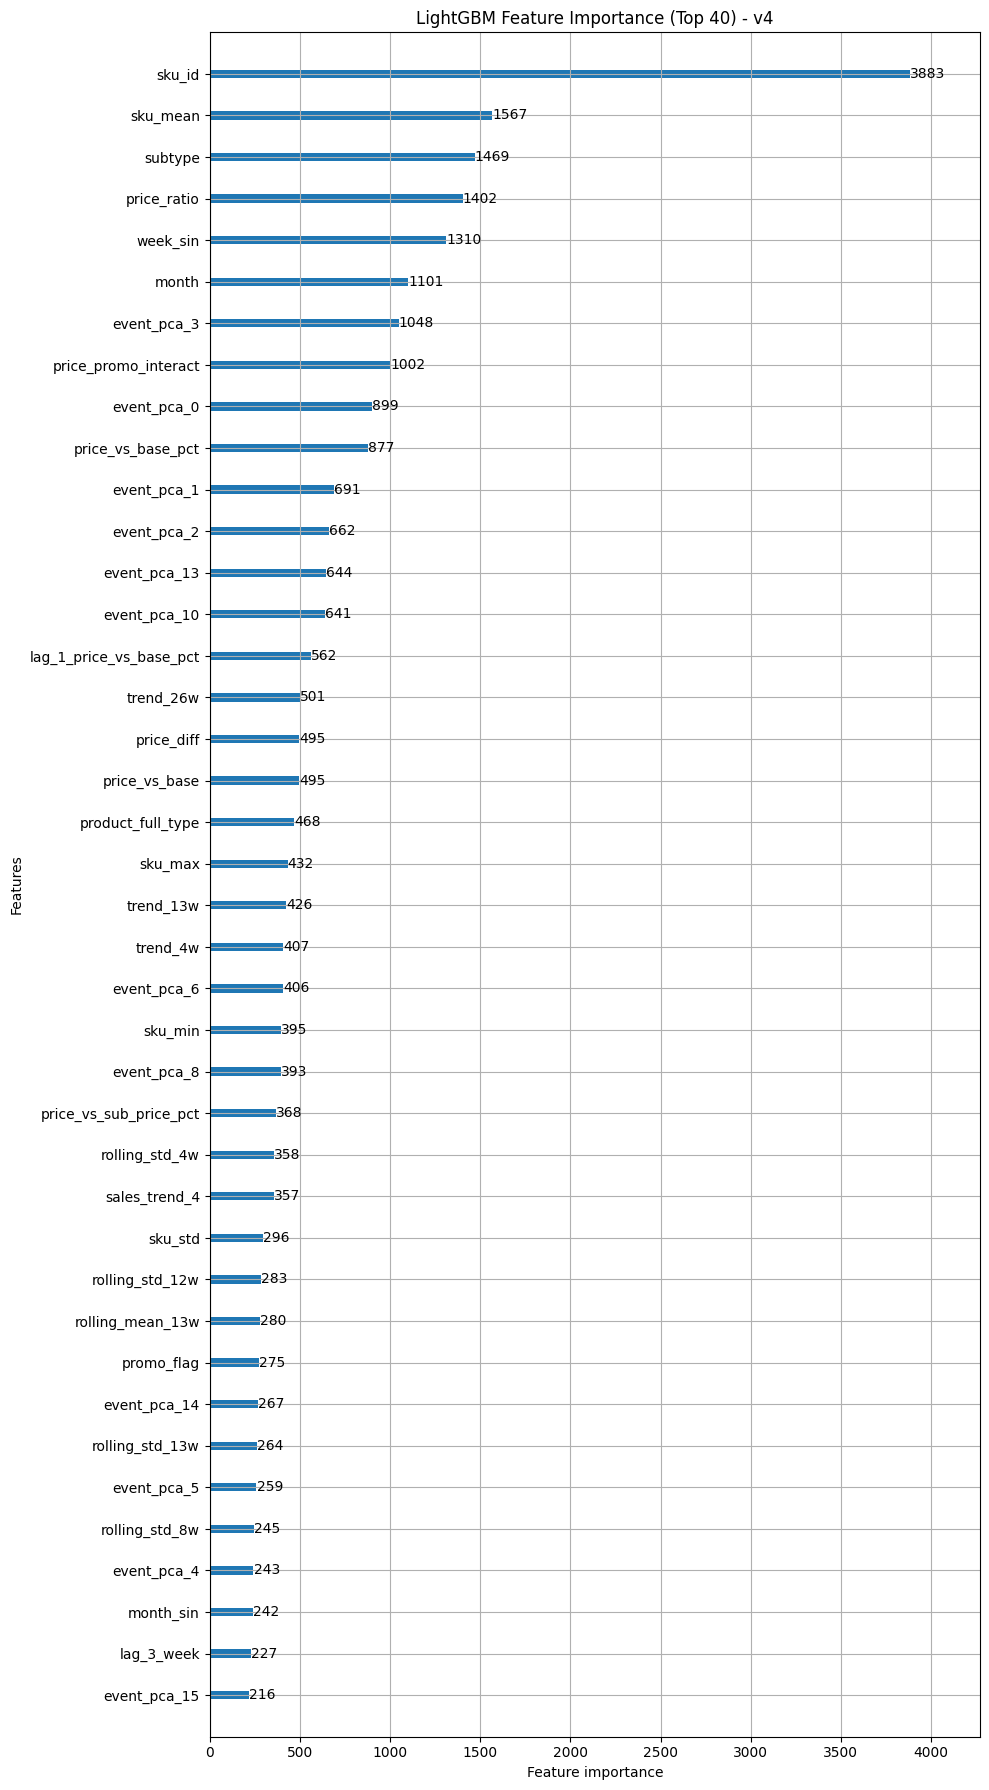

In [4]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import re
import warnings
import matplotlib.pyplot as plt # Import for plotting

warnings.filterwarnings('ignore')

# --- 1. Load Data ---
print("📂 Loading data ...")
try:
    base_path = "./agent_ds_commerce/"
    train_df = pd.read_csv(base_path + "sales_history_train.csv")
    test_df = pd.read_csv(base_path + "sales_history_test.csv")
    products_df = pd.read_csv(base_path + "products.csv")
    events_df = pd.read_csv(base_path + "store_events.csv")
except FileNotFoundError:
    print("---! File Not Found Error !---")
    print("Please make sure all CSV files are in a sub-folder named './agent_ds_commerce/'.")
    exit()

print(f"Train data: {train_df.shape}")
print(f"Test data: {test_df.shape}")
print(f"Products data: {products_df.shape}")
print(f"Events data: {events_df.shape}")


# --- 2. Text Feature Engineering (from Friend's Code) ---
print("🧠 Encoding event text with all-MiniLM-L6-v2 ...")
st_model = SentenceTransformer("all-MiniLM-L6-v2")
events_df["event_description"] = events_df["event_description"].fillna("No event")
embeddings = st_model.encode(events_df["event_description"].tolist(), show_progress_bar=True)

print("🔻 Reducing embeddings with PCA(16) ...")
pca = PCA(n_components=16, random_state=42)
embeddings_pca = pca.fit_transform(embeddings)

pca_feature_names = [f"event_pca_{i}" for i in range(embeddings_pca.shape[1])]
events_pca_df = pd.DataFrame(embeddings_pca, columns=pca_feature_names)
events_df = pd.concat([events_df, events_pca_df], axis=1)


# --- 3. Main Feature Engineering ---
print("\nStarting main feature engineering...")

def create_features(sales_df, products_df, events_df_with_pca):
    """Merges all data and creates temporal, price, and text features."""
    df = pd.merge(sales_df, products_df, on='sku_id', how='left')
    
    # Merge PCA event features, drop the raw text
    df = pd.merge(df, events_df_with_pca.drop(columns=['event_description']), on='week', how='left')
    
    # 1. Price Features (v3)
    df['price_vs_base'] = df['price'] - df['base_price']
    df['price_vs_base_pct'] = (df['price'] - df['base_price']) / (df['base_price'] + 1e-6)
    
    # 2. Seasonality Features (v3)
    df['month'] = ((df['week'] - 1) // 4) + 1
    df['week_sin'] = np.sin(2 * np.pi * df['week'] / 52.0)
    df['week_cos'] = np.cos(2 * np.pi * df['week'] / 52.0)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12.0)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12.0)
    
    # 3. Domain Knowledge Features (v3)
    df['product_full_type'] = df['category'].astype(str) + "_" + df['subtype'].astype(str)

    # 4. Calendar Features (from Friend's Code)
    df["is_holiday_season"] = df["week"].isin([47, 48, 49, 50, 51, 52, 1]).astype(int)
    df["is_summer"] = df["week"].isin(range(22, 36)).astype(int)
    df["week_of_month"] = ((df["week"] - 1) % 4) + 1
    
    return df

# Concatenate train/test to create lags seamlessly
test_df_copy = test_df.copy()
test_df_copy['units_sold'] = np.nan # Add placeholder
all_data = pd.concat([train_df, test_df_copy], ignore_index=True)
all_data = all_data.sort_values(by=['sku_id', 'week']).reset_index(drop=True)

# Apply main feature engineering
all_data_featured = create_features(all_data, products_df, events_df)

# 5. Global SKU Stats (from Friend's Code)
# CRITICAL: Calculate stats ONLY on training data to prevent leakage
print("Creating global SKU stats (from training data)...")
train_stats_df = all_data_featured[all_data_featured['week'] <= 44]
sku_stats = train_stats_df.groupby('sku_id')['units_sold'].agg([
    ('sku_mean', 'mean'),
    ('sku_std', 'std'),
    ('sku_max', 'max'),
    ('sku_min', 'min')
]).reset_index()

# Merge stats back onto the full dataset
all_data_featured = all_data_featured.merge(sku_stats, on='sku_id', how='left')


# 6. Group-Level Price Features (from v3)
print("Creating group-level price features...")
group_price_feats = all_data_featured.groupby(['category', 'week'])['price'].transform('mean')
all_data_featured['price_vs_cat_price_pct'] = (all_data_featured['price'] - group_price_feats) / (group_price_feats + 1e-6)

group_price_feats = all_data_featured.groupby(['subtype', 'week'])['price'].transform('mean')
all_data_featured['price_vs_sub_price_pct'] = (all_data_featured['price'] - group_price_feats) / (group_price_feats + 1e-6)


# 7. Lagged & Rolling Features (MERGED)
print("Creating SKU-level lagged and rolling features...")
all_data_featured = all_data_featured.sort_values(by=['sku_id', 'week'])
grouped_sku = all_data_featured.groupby('sku_id')
grouped_sales = grouped_sku['units_sold']

# 7a. Lagged Sales (Merged List)
lags = [1, 2, 3, 4, 8, 13, 26, 52] # v3 + FC
for lag in lags:
    all_data_featured[f'lag_{lag}_week'] = grouped_sales.shift(lag)

# 7b. Rolling & Expanding Sales (Merged List)
windows = [2, 4, 8, 12, 13, 26] # v3 + FC
shifted_sales = grouped_sales.shift(1) # CRITICAL: Shift *before* rolling

for w in windows:
    all_data_featured[f'rolling_mean_{w}w'] = shifted_sales.rolling(window=w, min_periods=1).mean()
    all_data_featured[f'rolling_std_{w}w'] = shifted_sales.rolling(window=w, min_periods=1).std()

# Expanding window (from v3)
all_data_featured['expanding_mean'] = shifted_sales.expanding(min_periods=1).mean()
all_data_featured['expanding_std'] = shifted_sales.expanding(min_periods=1).std()

# EMA (from FC)
all_data_featured[f"ema_4"] = shifted_sales.ewm(span=4, adjust=False).mean()

# 7c. Lagged Price & Promo Features (from v3 + FC)
print("Creating lagged price and promo features...")
all_data_featured['lag_1_price_vs_base_pct'] = grouped_sku['price_vs_base_pct'].shift(1)
all_data_featured['lag_1_promo_flag'] = grouped_sku['promo_flag'].shift(1)

# 7d. New Price Features (from FC)
all_data_featured["price_diff"] = grouped_sku["price"].diff()
all_data_featured["price_ratio"] = all_data_featured["price"] / (grouped_sku["price"].transform("mean") + 1e-6)
all_data_featured["price_promo_interact"] = all_data_featured["price"] * all_data_featured["promo_flag"]


# 8. Group-Level Lagged Sales Features (from v2/v3)
print("Creating group-level lagged sales features...")
# --- START FIX: Assign to temporary columns ---
# These columns contain current-week info (leaky) and must be dropped
all_data_featured['cat_sales_mean_TEMP'] = all_data_featured.groupby(['category', 'week'])['units_sold'].transform('mean')
all_data_featured['sub_sales_mean_TEMP'] = all_data_featured.groupby(['subtype', 'week'])['units_sold'].transform('mean')

group_lags = [1, 2, 4, 8]
for lag in group_lags:
    # Now create the lagged (non-leaky) features from the temp columns
    all_data_featured[f'cat_sales_lag_{lag}'] = all_data_featured.groupby('category')['cat_sales_mean_TEMP'].shift(lag)
    all_data_featured[f'sub_sales_lag_{lag}'] = all_data_featured.groupby('subtype')['sub_sales_mean_TEMP'].shift(lag)

# Drop the temporary leaky columns so they are not used as features
all_data_featured = all_data_featured.drop(columns=['cat_sales_mean_TEMP', 'sub_sales_mean_TEMP'])
# --- END FIX --

# 9. Trend Features (MERGED)
print("Creating trend features...")
# v3 Trend
for w in [4, 13, 26]:
    all_data_featured[f'trend_{w}w'] = all_data_featured['lag_1_week'] / (all_data_featured[f'rolling_mean_{w}w'] + 1e-6)
# FC Trend
all_data_featured["sales_trend_4"] = grouped_sales.shift(1) - grouped_sales.shift(5)


# Fill initial NaNs from lags/rolling/trend features
all_data_featured = all_data_featured.fillna(0) # Fill NaNs


# --- 4. Preprocessing for Model ---
print("Preprocessing data for the model...")

# Define feature columns
categorical_cols = ['sku_id', 'category', 'subtype', 'product_full_type', 'month', 'promo_flag']
numerical_cols = [
    # Price (v3)
    'price', 'base_price', 'price_vs_base', 'price_vs_base_pct',
    'price_vs_cat_price_pct', 'price_vs_sub_price_pct',
    # Seasonality (v3)
    'week_sin', 'week_cos', 'month_sin', 'month_cos',
    # Calendar (FC)
    'is_holiday_season', 'is_summer', 'week_of_month',
    # Lagged Price/Promo (v3)
    'lag_1_price_vs_base_pct', 'lag_1_promo_flag',
    # New Price (FC)
    'price_diff', 'price_ratio', 'price_promo_interact',
    # Global Stats (FC)
    'sku_mean', 'sku_std', 'sku_max', 'sku_min',
    # Expanding Window (v3)
    'expanding_mean', 'expanding_std',
    # EMA (FC)
    'ema_4',
]
# Add lag/rolling/trend/group-lag/pca columns
numerical_cols += [col for col in all_data_featured.columns if 
                   'lag_' in col or 
                   'rolling_' in col or 
                   'trend_' in col or
                   'cat_sales_' in col or
                   'sub_sales_' in col or
                   'event_pca_' in col # NEW TEXT FEATURES
                  ]

target_col = 'units_sold'

# 1. Target Transform (Log transform from v3 - this is robust)
all_data_featured['target_log'] = np.log1p(all_data_featured[target_col])

# 2. Categorical Encoders
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    all_data_featured[col] = le.fit_transform(all_data_featured[col].astype(str))
    label_encoders[col] = le

# --- 5. Time-Based Validation Split (from FC) ---
# Use more robust 8-week holdout
VALIDATION_WEEKS = 8
max_train_week = 44
VALIDATION_START_WEEK = max_train_week - VALIDATION_WEEKS + 1 # Week 37

train_full_df = all_data_featured[all_data_featured['week'] <= max_train_week].copy()

# Local training set (weeks 1-36)
train_local_df = train_full_df[train_full_df['week'] < VALIDATION_START_WEEK]
# Local validation set (weeks 37-44)
val_local_df = train_full_df[train_full_df['week'] >= VALIDATION_START_WEEK]

# The final test set (weeks 45-52)
test_final_df = all_data_featured[all_data_featured['week'] > max_train_week].copy()

# Define feature set
features = numerical_cols + categorical_cols
features = list(dict.fromkeys(features)) # Remove duplicates

X_train_local = train_local_df[features]
y_train_local_log = train_local_df['target_log']
y_train_local_orig = train_local_df[target_col] 

X_val_local = val_local_df[features]
y_val_local_log = val_local_df['target_log']
y_val_local_orig = val_local_df[target_col] 

X_train_full = train_full_df[features]
y_train_full_log = train_full_df['target_log']
X_test_final = test_final_df[features]

print(f"\nLocal Train shape:    {X_train_local.shape}")
print(f"Local Validate shape: {X_val_local.shape} (Weeks {VALIDATION_START_WEEK}-{max_train_week})")
print(f"Full Train shape:     {X_train_full.shape}")
print(f"Final Test shape:     {X_test_final.shape}")
print(f"Total features: {len(features)}")


# --- 6. Train LightGBM Model (MERGED Params) ---
print("\nTraining LightGBM model with local validation...")

lgb_params = {
    'objective': 'rmse', # Predicting log1p, so rmse is good
    'metric': 'rmse',
    'n_estimators': 3000, 
    'learning_rate': 0.02, # Balanced LR
    # Hybrid params from FC and v3
    'num_leaves': 63, # More complex than v3, less than FC
    'max_depth': 8,   # from FC
    'subsample': 0.7, # from FC (regularization)
    'colsample_bytree': 0.7, # from FC (regularization)
    'min_child_samples': 20, # from FC
    'reg_alpha': 0.1,  # from FC
    'reg_lambda': 0.1, # from FC
    'verbose': -1,
    'n_jobs': -1, 
    'seed': 42,
    'boosting_type': 'gbdt',
}

model = lgb.LGBMRegressor(**lgb_params)

model.fit(
    X_train_local,
    y_train_local_log,
    eval_set=[(X_val_local, y_val_local_log)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(150, verbose=True)], # Increased patience
    categorical_feature=categorical_cols 
)

# --- 7. Evaluate Local Validation RMSE ---
print("\nEvaluating model on local validation set...")
preds_val_log = model.predict(X_val_local)

preds_val_orig = np.expm1(preds_val_log)
preds_val_orig[preds_val_orig < 0] = 0 

local_rmse = np.sqrt(mean_squared_error(y_val_local_orig, preds_val_orig))
print(f"\n#################################################")
print(f"### Local Validation RMSE (Original Scale): {local_rmse:.4f} ###")
print(f"#################################################")

# --- 8. Retrain and Predict for Submission ---
print("\nRetraining model on full training data (Weeks 1-44)...")
best_iteration = model.best_iteration_

if best_iteration is None or best_iteration <= 0:
    print("Warning: Early stopping did not find a best iteration. Using 1500 as a fallback.")
    best_iteration = 1500 # Fallback
else:
    best_iteration = int(best_iteration * 1.05) # Small boost
    print(f"Retraining with {best_iteration} estimators.")

final_params = lgb_params.copy()
final_params['n_estimators'] = best_iteration 
final_params.pop('metric', None) 

final_model = lgb.LGBMRegressor(**final_params) 

final_model.fit(
    X_train_full,
    y_train_full_log,
    categorical_feature=categorical_cols
)

print("Making predictions on final test data (Weeks 45-52)...")
preds_test_log = final_model.predict(X_test_final)

preds_test_orig = np.expm1(preds_test_log)
preds_test_orig[preds_test_orig < 0] = 0

submission_df = test_final_df[['sku_id', 'week']].copy()
# Round to 0 decimal places for submission, as units should be integers
submission_df['units_sold_next_week'] = np.round(preds_test_orig).astype(int)


# --- START: FIX FOR SKU_ID AND SORTING ---
try:
    submission_df['original_sku_id'] = label_encoders['sku_id'].inverse_transform(submission_df['sku_id'])
except Exception as e:
    print(f"Error inverse-transforming sku_id: {e}")
    submission_df['original_sku_id'] = submission_df['sku_id']

submission_df = submission_df.drop(columns=['sku_id'])
submission_df = submission_df.rename(columns={'original_sku_id': 'sku_id'})
submission_df['sku_id'] = submission_df['sku_id'].astype(int)
submission_df = submission_df.sort_values(by=['sku_id', 'week'])
submission_df = submission_df[['sku_id', 'week', 'units_sold_next_week']]
# --- END: FIX FOR SKU_ID AND SORTING ---

print("Prediction complete. Final sorting applied.")
print(submission_df.head(10))

submission_df.to_csv("commerce_challenge1_predictions_v4.csv", index=False)
print("\nSubmission file 'commerce_challenge1_predictions_v4.csv' saved.")

# --- 9. Bonus: Feature Importance ---
try:
    lgb.plot_importance(final_model, max_num_features=40, figsize=(10, 18))
    plt.title("LightGBM Feature Importance (Top 40) - v4")
    plt.tight_layout()
    plt.savefig("lgbm_feature_importance_v4.png", bbox_inches='tight')
    print("Feature importance plot saved to 'lgbm_feature_importance_v4.png'")
except Exception as e:
    print(f"Could not plot feature importance (requires matplotlib): {e}")

print("\nScript finished.")


In [ ]:
# # 2. Tabular-Only Baseline Model and Predictions

# # Select numeric features for baseline
# numeric_features = ['sku_id', 'week', 'price', 'promo_flag']
# print(f"📊 Using features: {numeric_features}")

# # Prepare training data
# X_train = train_sales[numeric_features]
# y_train = train_sales['units_sold']  # Target variable

# # Prepare test data
# X_test = test_sales[numeric_features]

# # Train simple Random Forest regressor baseline
# print("🤖 Training Random Forest regressor...")
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# predictions = model.predict(X_test)

# # Create submission file
# submission_df = pd.DataFrame({
#     'sku_id': test_sales['sku_id'],
#     'week': test_sales['week'],
#     'units_sold_next_week': predictions
# })

# # Save predictions
# submission_df.to_csv("commerce_challenge1_predictions.csv", index=False)
# print(f"✅ Predictions saved: {submission_df.shape[0]} predictions")
# print(f"   Preview: {submission_df.head(3)}")
# print(f"   Prediction range: {predictions.min():.2f} to {predictions.max():.2f}")

📊 Using features: ['sku_id', 'week', 'price', 'promo_flag']
🤖 Training Random Forest regressor...
✅ Predictions saved: 12000 predictions
   Preview:    sku_id  week  units_sold_next_week
0       1    45                 73.02
1       1    46                 72.21
2       1    47                 66.83
   Prediction range: 4.38 to 113.81


In [5]:
# 3. Submit Predictions

# Submit predictions to the competition
print("🚀 Submitting predictions...")

try:
    result = client.submit_prediction("Commerce", 1, "commerce_challenge1_predictions_v4.csv")

    if result['success']:
        print("✅ Submission successful!")
        print(f"   📊 Score: {result['score']:.4f}")
        print(f"   📏 Metric: {result['metric_name']}")
        print(f"   ✔️  Validation: {'Passed' if result['validation_passed'] else 'Failed'}")
    else:
        print("❌ Submission failed!")
        print(f"   Error details: {result.get('details', {}).get('validation_errors', 'Unknown error')}")

except Exception as e:
    print(f"💥 Submission error: {e}")
    print("🔧 Check your API key and team name are correct!")

print("\n🎯 Next steps:")
print("   1. Try incorporating relevant information outside this table!")
print("   2. Move on to Commerce Challenge 2!")

🚀 Submitting predictions...
✅ Prediction submitted successfully!
📊 Score: 7.6198 (RMSE)
✅ Validation passed
✅ Submission successful!
   📊 Score: 7.6198
   📏 Metric: RMSE
   ✔️  Validation: Passed

🎯 Next steps:
   1. Try incorporating relevant information outside this table!
   2. Move on to Commerce Challenge 2!
